<a href="https://colab.research.google.com/github/ganeshmukhiya/Topic-Modeling-NMF/blob/main/copy0frecon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data

# Preprocess the data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

# Apply NMF
n_topics = 10
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

# Calculate reconstruction error
reconstruction_error = nmf_model.reconstruction_err_
print(f'Reconstruction Error: {reconstruction_error:.4f}')

# Alternative manual calculation of reconstruction error
reconstructed_X = np.dot(W, H)
manual_reconstruction_error = np.linalg.norm(X - reconstructed_X, 'fro')
print(f'Manual Reconstruction Error: {manual_reconstruction_error:.4f}')


Reconstruction Error: 101.7142
Manual Reconstruction Error: 101.7142


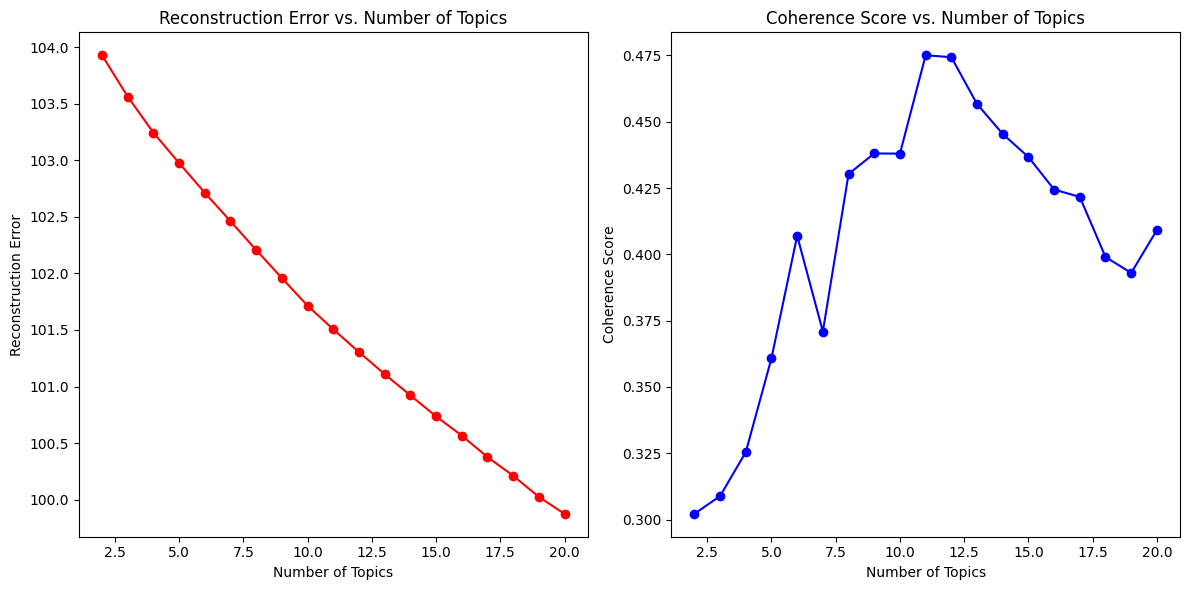

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sklearn.model_selection import train_test_split

# Step 1: Load and Prepare Data
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data

# Preprocess the data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

# Tokenize data for coherence calculation
tokenized_data = [doc.split() for doc in data]

# Step 2: Define function to calculate coherence
def calculate_coherence(nmf_model, feature_names, tokenized_data):
    topics = []
    for topic in nmf_model.components_:
        top_features_indices = topic.argsort()[-10:][::-1]
        top_features = [feature_names[i] for i in top_features_indices]
        topics.append(top_features)

    dictionary = Dictionary(tokenized_data)
    corpus = [dictionary.doc2bow(text) for text in tokenized_data]
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Step 3: Define evaluation ranges and storage for metrics
topic_range = range(2, 21)  # Adjust this range as needed
reconstruction_errors = []
coherence_scores = []

# Step 4: Loop over the number of topics to calculate metrics
for n_topics in topic_range:
    nmf_model = NMF(n_components=n_topics, random_state=42)
    W = nmf_model.fit_transform(X)
    H = nmf_model.components_

    # Calculate reconstruction error
    reconstruction_errors.append(nmf_model.reconstruction_err_)

    # Calculate coherence score
    feature_names = vectorizer.get_feature_names_out()
    coherence_score = calculate_coherence(nmf_model, feature_names, tokenized_data)
    coherence_scores.append(coherence_score)

# Step 5: Plot Reconstruction Error vs. Number of Topics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(topic_range, reconstruction_errors, marker='o', color='red')
plt.title('Reconstruction Error vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error')

# Step 6: Plot Coherence Score vs. Number of Topics
plt.subplot(1, 2, 2)
plt.plot(topic_range, coherence_scores, marker='o', color='blue')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()
